<a href="https://colab.research.google.com/github/bluejay-ai/DeepLearning-TSAI/blob/master/Project2-Not-an-ideal-network/Session2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Not an ideal network**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

# The above cell imports Keras. It is the beginning to the prayer to the Heavenly Gods of ML

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Convolution2D
from keras.utils import np_utils

from keras.datasets import mnist

The above cell calls each and every heavenly god in specific to get their blessings.

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

The above cells loads the MNIST dataset into X_train, Y_train as training set and X_test and Y_test as test set.

(60000, 28, 28)


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

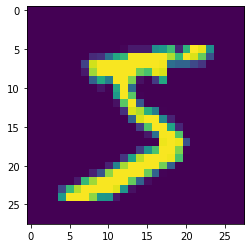

In [81]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])
X_train[0]

The above cell prints the shape of X_train, i.e., 60000 images of 28X28 resolution. The imshow function plots the X_train[0], which looks like a 5. X_train[0] shows the size of image matrix, which is 28X28

In [82]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train[0]

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
      

The above cell reshapes the images into 28 matrices of 28X1 size. As shown above, X_train[0] prints the 28 matrices of the size.

In [83]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
X_train[0,5]

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.01176471],
       [0.07058824],
       [0.07058824],
       [0.07058824],
       [0.49411765],
       [0.53333336],
       [0.6862745 ],
       [0.10196079],
       [0.6509804 ],
       [1.        ],
       [0.96862745],
       [0.49803922],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ]], dtype=float32)

The above cell converts the value of pixels into float32 format and normalizes it by dividing by 255. This makes computation faster.

In [84]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

The above cell prints the value of Y_train for first 10 enteries. For eg, the 0 element in training set is 5.

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

This converts the Y_train into a 10-dimensional categorical array, so that probablilty of each class can be trained and predicted using the network.

In [86]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [87]:
from keras.layers import Activation, MaxPooling2D

model = Sequential() 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(64, 3, 3, activation='relu'))
model.add(Convolution2D(128, 3, 3, activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(256, 3, 3, activation='relu'))
model.add(Convolution2D(512, 3, 3, activation='relu'))
model.add(Convolution2D(1024, 3, 3, activation='relu'))
model.add(Convolution2D(2048, 3, 3, activation='relu'))
model.add(Convolution2D(10, 3, 3, activation='relu'))

model.add(Flatten())
model.add(Activation('softmax'))

model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_153 (Conv2D)          (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_154 (Conv2D)          (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_155 (Conv2D)          (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_156 (Conv2D)          (None, 9, 9, 256)         295168    
_________________________________________________________________
conv2d_157 (Conv2D)          (None, 7, 7, 512)         1180160   
_________________________________________________________________
conv2d_158 (Conv2D)          (None, 5, 5, 1024)      

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init


The above cell defines the model. The model is defined as sequential, which is linear stack fo layers.
The network has three convolution layers, with relu as an activation function. Relu doesn't allow negative values to be carry forwarded and hence filters the information. The fourth layer is Maxpooling layer, which amplifies the loud features in the image. Later, we have five convoltuion layers. 
Layer Number : Input Image Resolution :: Kernel :: Output Resolution :: Global Receptive Field 
//Layer1 : 28 x 28 x 1   ::  3 x 3 x 32  ::  26 x 26 x 32 : 3

//Layer2 : 26 x 26 x 32  ::  3 x 3 x 64  ::  24 x 24 X 64 : 5

//Layer3 : 24 X 24 X 64  ::  3 x 3 x 128 ::  22 x 22 x 128 : 7

//Layer4 : 22 x 22 x 128 :: MaxPooling 2x2 :: 11 X 11 X 128 : 14

//Layer5 : 11 x 11 x 128 ::  3 x 3 x 256 :: 9 x 9 x 256 : 16

//Layer6 : 9 x 9 x 256 ::  3 x 3 x 512 :: 7 x 7 x 512 : 18

//Layer7 : 7 x 7 x 512 ::  3 x 3 x 1024 :: 5 x 5 x 1024 : 20

//Layer8 : 5 x 5 x 1024 :: 3 x 3 x 2048 :: 3 x 3 x 2048 : 22 

//Layer9 : 3 x 3 x 2048 :: 3 x 3 x 10  :: 1 x 1 x 10 : 24


The flatten layer flattens the output to a 1xN matrix. 

The last layer applies softmax activation, i.e, it creates the categorically probablilty distribtuion. It tells us the probablilty that the number is 0,1,2...9 between 0 to 1.


In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

This configures the training process. The metrics is defined as accuracy

In [89]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 65s 1ms/step - loss: 1.6923 - acc: 0.2916
Epoch 2/10
60000/60000 [==============================] - 64s 1ms/step - loss: 1.6486 - acc: 0.2963
Epoch 3/10
60000/60000 [==============================] - 64s 1ms/step - loss: 1.6456 - acc: 0.2956
Epoch 4/10
60000/60000 [==============================] - 64s 1ms/step - loss: 1.8647 - acc: 0.2238
Epoch 5/10
60000/60000 [==============================] - 64s 1ms/step - loss: 2.3163 - acc: 0.0996
Epoch 6/10
60000/60000 [==============================] - 63s 1ms/step - loss: 2.3026 - acc: 0.0987
Epoch 7/10
60000/60000 [==============================] - 64s 1ms/step - loss: 2.3026 - acc: 0.0987
Epoch 8/10
60000/60000 [==============================] - 64s 1ms/step - loss: 2.3026 - acc: 0.0987
Epoch 9/10
60000/60000 [==============================] - 64s 1ms/step - loss: 2.3026 - acc: 0.0987
Epoch 10/10
60000/60000 [==============================] - 64s 1ms/step - loss: 2.3026 - acc: 0.0987

This is training the model using X_train and Y_train. The Epoch is set to 10.

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

This is evaluating the model on the test set.

In [91]:
print(score)

[2.3025851249694824, 0.098]


The model has poor accuracy.

In [0]:
y_pred = model.predict(X_test)

This is the prediction of model on the test set.

In [93]:
print(y_pred[:9])
print(y_test[:9])

[[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]]
[7 2 1 0 4 1 4 9 5]


This displays the difference between the predicted value and actual value of testing set.

#Why this is not an ideal network ?

The network is unable the see the entire image, as the global recpetive field is not equat to the size of the image. We need one more layer of convolution to fix this. Let's create another model by fixing this problem.

In [97]:
from keras.layers import Activation, MaxPooling2D

model_fixed = Sequential() 
model_fixed.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model_fixed.add(Convolution2D(64, 3, 3, activation='relu'))
model_fixed.add(Convolution2D(128, 3, 3, activation='relu'))
model_fixed.add(Convolution2D(256, 3, 3, activation='relu'))
model_fixed.add(Convolution2D(512, 3, 3, activation='relu'))
model_fixed.add(MaxPooling2D(pool_size=(2, 2)))
model_fixed.add(Convolution2D(512, 3, 3, activation='relu'))
model_fixed.add(Convolution2D(1024, 3, 3, activation='relu'))
model_fixed.add(Convolution2D(2048, 3, 3, activation='relu'))
model_fixed.add(Convolution2D(10, 3, 3, activation='relu'))

model_fixed.add(Flatten())
model_fixed.add(Activation('softmax'))

model_fixed.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_167 (Conv2D)          (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_168 (Conv2D)          (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_169 (Conv2D)          (None, 22, 22, 128)       73856     
_________________________________________________________________
conv2d_170 (Conv2D)          (None, 20, 20, 256)       295168    
_________________________________________________________________
conv2d_171 (Conv2D)          (None, 18, 18, 512)       1180160   
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 9, 9, 512)         0         
_________________________________________________________________
conv2d_172 (Conv2D)          (None, 7, 7, 512)       

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your 

In [0]:
model_fixed.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [99]:
model_fixed.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 81s 1ms/step - loss: 2.3028 - acc: 0.0986
Epoch 2/10
60000/60000 [==============================] - 78s 1ms/step - loss: 2.3026 - acc: 0.0987
Epoch 3/10
60000/60000 [==============================] - 79s 1ms/step - loss: 2.3026 - acc: 0.0987
Epoch 4/10
60000/60000 [==============================] - 78s 1ms/step - loss: 2.3026 - acc: 0.0987
Epoch 5/10
60000/60000 [==============================] - 78s 1ms/step - loss: 2.3026 - acc: 0.0987
Epoch 6/10
60000/60000 [==============================] - 78s 1ms/step - loss: 2.3026 - acc: 0.0987
Epoch 7/10
60000/60000 [==============================] - 79s 1ms/step - loss: 2.3026 - acc: 0.0987
Epoch 8/10
60000/60000 [==============================] - 78s 1ms/step - loss: 2.3026 - acc: 0.0987
Epoch 9/10
60000/60000 [==============================] - 78s 1ms/step - loss: 2.3026 - acc: 0.0987
Epoch 10/10
60000/60000 [==============================] - 78s 1ms/step - loss: 2.3026 - acc: 0.0987

In [100]:
score = model_fixed.evaluate(X_test, Y_test, verbose=1)

10000/10000 [==============================] - 4s 373us/step


In [101]:
print(score)

[2.3025851249694824, 0.098]


In [0]:
y_pred = model.predict(X_test)

In [103]:
print(y_pred[:20])
print(y_test[:20])

[[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
